# **Customer Segmentation**

In [13]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

Load data

In [14]:
df = pd.read_csv('Mall_Customers.csv')

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df.shape

(200, 5)

In [17]:
df.groupby('Gender')['Spending Score (1-100)'].mean()

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

In [18]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Annual Income (k$)'] = scaler.fit_transform(df[['Annual Income (k$)']])
df['Spending Score (1-100)'] = scaler.fit_transform(df[['Spending Score (1-100)']])

In [20]:
df.drop('CustomerID',axis=1,inplace=True)

In [21]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0,-0.276302,2.268791,1.118061
196,0,0.441365,2.497807,-0.861839
197,1,-0.491602,2.497807,0.923953
198,1,-0.491602,2.917671,-1.250054


In [22]:
from sklearn.cluster import KMeans,DBSCAN

In [23]:
df_dbscan = df.copy()
df_kmean = df.copy()

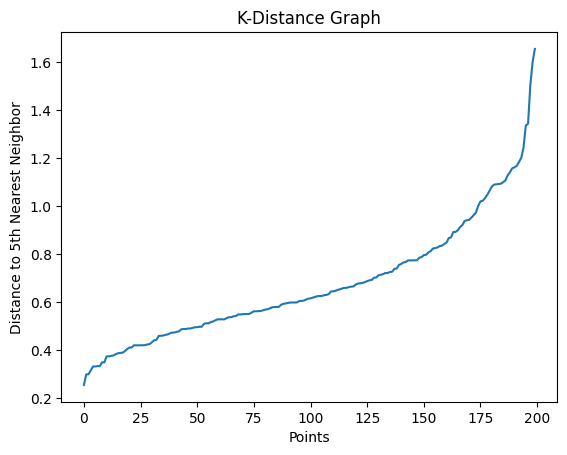

In [24]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
# Fit NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5).fit(df_dbscan)
distances, _ = neighbors.kneighbors(df_dbscan)

# Sort distances for k-distance plot
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Points")
plt.ylabel("Distance to 5th Nearest Neighbor")
plt.show()

In [25]:
dbscan = DBSCAN(eps=0.8,min_samples=8)
df_dbscan['Cluster'] = dbscan.fit_predict(df)

In [26]:
noise_points = df_dbscan[df_dbscan['Cluster'] == -1]
print(f"Number of noise points: {len(noise_points)}")
print(noise_points)

Number of noise points: 52
     Gender       Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0         1 -1.424569           -1.738999               -0.434801       -1
1         1 -1.281035           -1.738999                1.195704       -1
2         0 -1.352802           -1.700830               -1.715913       -1
4         0 -0.563369           -1.662660               -0.395980       -1
6         0 -0.276302           -1.624491               -1.715913       -1
8         1  1.804932           -1.586321               -1.832378       -1
10        1  2.020232           -1.586321               -1.405340       -1
11        0 -0.276302           -1.586321                1.894492       -1
12        0  1.374332           -1.548152               -1.366519       -1
14        1 -0.132768           -1.548152               -1.444162       -1
15        1 -1.209269           -1.548152                1.118061       -1
16        0 -0.276302           -1.509983               -0.590088       -

In [27]:
df_dbscan['Cluster'].value_counts()

Cluster
 0    90
-1    52
 1    24
 3    15
 2    11
 4     8
Name: count, dtype: int64

In [28]:
dbscan?

Type:        DBSCAN
String form: DBSCAN(eps=0.8, min_samples=8)
File:        c:\python311\lib\site-packages\sklearn\cluster\_dbscan.py
Docstring:  
Perform DBSCAN clustering from vector array or distance matrix.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
Finds core samples of high density and expands clusters from them.
Good for data which contains clusters of similar density.

Read more in the :ref:`User Guide <dbscan>`.

Parameters
----------
eps : float, default=0.5
    The maximum distance between two samples for one to be considered
    as in the neighborhood of the other. This is not a maximum bound
    on the distances of points within a cluster. This is the most
    important DBSCAN parameter to choose appropriately for your data set
    and distance function.

min_samples : int, default=5
    The number of samples (or total weight) in a neighborhood for a point
    to be considered as a core point. This includes the point itself.

metric : str, or c

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
labels = dbscan.fit_predict(df_dbscan)
score = silhouette_score(df_dbscan, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.249355710277663


In [31]:
wcci = []
for i in range(1,10):
    kmean = KMeans(n_clusters=i,n_init='auto')
    kmean.fit(df_kmean)
    wcci.append(kmean.inertia_) 

In [32]:
import matplotlib.pyplot as plt

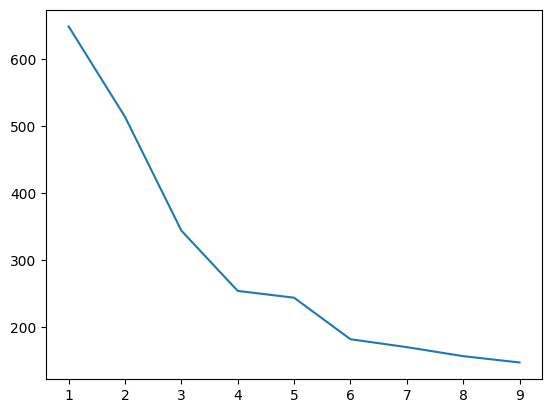

In [33]:
plt.plot(range(1,10),wcci)

In [34]:
kmean = KMeans(n_clusters=4,n_init='auto')
kmean.fit(df_kmean)
kmean.inertia_
df_kmean['Cluster'] = kmean.predict(df_kmean)

In [35]:
labels = kmean.fit_predict(df_kmean)
score = silhouette_score(df_kmean, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.37526313047464854


In [36]:
cluster_summary = df_kmean.groupby('Cluster').agg({'Spending Score (1-100)':['mean','median','count']}).reset_index()

In [37]:
cluster_summary.columns = ['Cluster', 'Avg_Spending', 'Median_Spending', 'Customer_Count']


In [38]:
cluster_summary

,Cluster,Avg_Spending,Median_Spending,Customer_Count
0,0,0.392030,0.225165,57
1,1,-0.379602,-0.163051,64
2,2,-1.197297,-1.288876,39
3,3,1.216085,1.273347,40


In [39]:
def group_cluster(x):
    if x <= -1.1:
        return 'No Priority'
    elif x <= -0.3:
        return 'Less Priority'
    elif x <= 0.392030:
        return 'Normal'
    else:
        return 'Premium'

In [40]:
cluster_summary['Cluster_group'] = cluster_summary['Avg_Spending'].apply(group_cluster)

In [41]:
cluster_summary

,Cluster,Avg_Spending,Median_Spending,Customer_Count,Cluster_group
0,0,0.392030,0.225165,57,Normal
1,1,-0.379602,-0.163051,64,Less Priority
2,2,-1.197297,-1.288876,39,No Priority
3,3,1.216085,1.273347,40,Premium


In [42]:
df_kmean = df_kmean.merge(cluster_summary, on='Cluster', how='left')
df_kmean

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Avg_Spending,Median_Spending,Customer_Count,Cluster_group
0,1,-1.424569,-1.738999,-0.434801,0,0.392030,0.225165,57,Normal
1,1,-1.281035,-1.738999,1.195704,0,0.392030,0.225165,57,Normal
2,0,-1.352802,-1.700830,-1.715913,0,0.392030,0.225165,57,Normal
3,0,-1.137502,-1.700830,1.040418,0,0.392030,0.225165,57,Normal
4,0,-0.563369,-1.662660,-0.395980,0,0.392030,0.225165,57,Normal
...,...,...,...,...,...,...,...,...,...
195,0,-0.276302,2.268791,1.118061,3,1.216085,1.273347,40,Premium
196,0,0.441365,2.497807,-0.861839,2,-1.197297,-1.288876,39,No Priority
197,1,-0.491602,2.497807,0.923953,3,1.216085,1.273347,40,Premium
198,1,-0.491602,2.917671,-1.250054,2,-1.197297,-1.288876,39,No Priority


In [43]:
cluster_summary

,Cluster,Avg_Spending,Median_Spending,Customer_Count,Cluster_group
0,0,0.392030,0.225165,57,Normal
1,1,-0.379602,-0.163051,64,Less Priority
2,2,-1.197297,-1.288876,39,No Priority
3,3,1.216085,1.273347,40,Premium


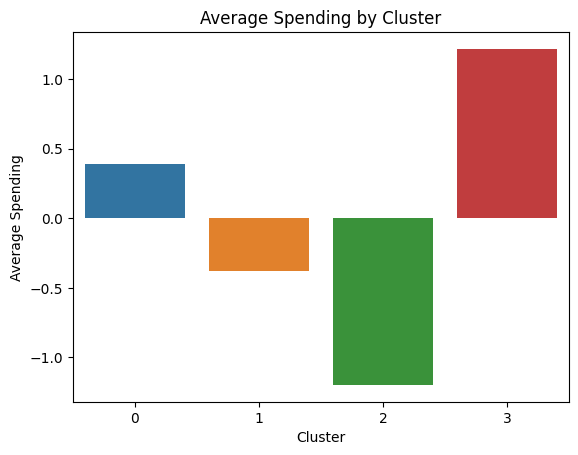

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of spending by cluster
sns.barplot(x='Cluster', y='Avg_Spending', data=cluster_summary)
plt.title('Average Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending')
plt.show()
